**1. Problem Statement:**
The company has collected data on its employees, including their department, salary, job satisfaction, and other relevant attributes. The goal is to build a predictive model that can identify employees who are at high risk of leaving the company and to develop targeted interventions to retain them.

**2. Future Possibilities of the Project:-** 
This project can be extended to predict employee turnover in other industries or organizations, helping companies optimize their human resources strategies.

# **People.csv Data Analysis Part**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1_EDA

In [2]:
df = pd.read_csv("D:\\Machine learning\ML-Project\\Empolyee Data Prediction\\dataset\\people.csv")


In [3]:
df.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfactoryLevel      14999 non-null  float64
 1   lastEvaluation         14999 non-null  float64
 2   numberOfProjects       14999 non-null  int64  
 3   avgMonthlyHours        14999 non-null  int64  
 4   timeSpent.company      14999 non-null  int64  
 5   workAccident           14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotionInLast5years  14999 non-null  int64  
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
df.dtypes

satisfactoryLevel        float64
lastEvaluation           float64
numberOfProjects           int64
avgMonthlyHours            int64
timeSpent.company          int64
workAccident               int64
left                       int64
promotionInLast5years      int64
dept                      object
salary                    object
dtype: object

In [6]:
df

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.11,0.85,7,275,4,0,1,0,support,medium
14995,0.99,0.83,4,274,2,0,0,0,sales,low
14996,0.72,0.72,4,175,4,0,0,0,technical,low
14997,0.24,0.91,5,177,5,0,0,0,sales,low


In [11]:
df['salary'].value_counts()

salary
low       5740
medium    5261
high       990
Name: count, dtype: int64

In [7]:
#check Null Value
df.isnull().sum()

satisfactoryLevel        0
lastEvaluation           0
numberOfProjects         0
avgMonthlyHours          0
timeSpent.company        0
workAccident             0
left                     0
promotionInLast5years    0
dept                     0
salary                   0
dtype: int64

In [12]:
df.shape

(11991, 10)

In [13]:

# Check duplicate
df.duplicated().sum()

0

In [14]:
# remove duplicates
df.drop_duplicates(inplace=True)

In [15]:
df.duplicated().sum()

0

In [16]:
df.describe()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [17]:
df['dept'].value_counts()

dept
sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: count, dtype: int64

In [18]:
df['salary'].value_counts()

salary
low       5740
medium    5261
high       990
Name: count, dtype: int64

In [19]:
#3.	Highest Experienced
# len(df[(df['timeSpent.company']>=5) & (df['promotionInLast5years']==1)])
df[(df['timeSpent.company']>=5) & (df['promotionInLast5years']==1)]

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
3150,0.24,0.65,6,275,5,1,0,1,support,medium
3353,0.16,0.99,3,213,6,1,0,1,RandD,medium
3368,0.95,0.48,5,214,6,1,0,1,sales,medium
3686,0.64,0.38,5,171,6,1,0,1,accounting,high
7204,0.78,0.40,4,145,5,1,0,1,sales,medium
7443,0.50,1.00,5,264,8,0,0,1,accounting,high
7444,0.52,0.84,3,261,8,0,0,1,accounting,low
7445,0.95,0.84,3,261,8,1,0,1,hr,medium
7446,0.48,0.42,2,275,6,1,0,1,hr,medium
7447,0.51,0.39,5,132,6,1,0,1,technical,low


In [20]:
# 4.	Highest experienced department wise
highest_experience_by_dept = df.groupby('dept')['timeSpent.company'].max()
highest_experience_by_dept

dept
IT             10
RandD           8
accounting     10
hr              8
management     10
marketing      10
product_mng    10
sales          10
support        10
technical      10
Name: timeSpent.company, dtype: int64

In [21]:
# df[(df['dept']=='IT') & (df['salary']=='high')]
df[df['salary']=='high']

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
44,0.45,0.49,2,149,3,0,1,0,product_mng,high
70,0.09,0.85,6,289,4,0,1,0,hr,high
201,0.37,0.46,2,149,3,0,1,0,marketing,high
231,0.10,0.86,6,278,4,0,1,0,technical,high
281,0.40,0.46,2,143,3,0,1,0,technical,high
...,...,...,...,...,...,...,...,...,...,...
14932,0.26,0.71,6,189,2,0,0,0,marketing,high
14943,0.77,0.71,4,223,3,0,0,0,sales,high
14976,0.97,0.66,4,218,3,0,0,0,sales,high
14981,0.97,0.55,4,166,3,1,0,0,accounting,high


In [22]:
# 5.	Highest salary department wise
df[(df['salary']=='high') & (df['dept'])]

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
44,0.45,0.49,2,149,3,0,1,0,product_mng,high
70,0.09,0.85,6,289,4,0,1,0,hr,high
201,0.37,0.46,2,149,3,0,1,0,marketing,high
231,0.10,0.86,6,278,4,0,1,0,technical,high
281,0.40,0.46,2,143,3,0,1,0,technical,high
...,...,...,...,...,...,...,...,...,...,...
14932,0.26,0.71,6,189,2,0,0,0,marketing,high
14943,0.77,0.71,4,223,3,0,0,0,sales,high
14976,0.97,0.66,4,218,3,0,0,0,sales,high
14981,0.97,0.55,4,166,3,1,0,0,accounting,high


In [23]:
# 6.	Satisfactory level department wise (highest/lowest)
high = df.groupby('dept')['satisfactoryLevel'].max()
high


dept
IT             1.0
RandD          1.0
accounting     1.0
hr             1.0
management     1.0
marketing      1.0
product_mng    1.0
sales          1.0
support        1.0
technical      1.0
Name: satisfactoryLevel, dtype: float64

In [24]:
low = df.groupby('dept')['satisfactoryLevel'].min()
low

dept
IT             0.09
RandD          0.09
accounting     0.09
hr             0.09
management     0.09
marketing      0.09
product_mng    0.09
sales          0.09
support        0.09
technical      0.09
Name: satisfactoryLevel, dtype: float64

In [25]:
# satifaction avg dept wise
satis_dept = df.groupby('dept')['satisfactoryLevel'].mean()
satis_dept

dept
IT             0.634016
RandD          0.627176
accounting     0.607939
hr             0.621947
management     0.631995
marketing      0.634770
product_mng    0.629825
sales          0.631349
support        0.634822
technical      0.627937
Name: satisfactoryLevel, dtype: float64

In [26]:
# find lowest and average satisfactory with dept wise
low_satisfn = df.groupby('dept')['satisfactoryLevel'].mean()
low_satisfn

dept
IT             0.634016
RandD          0.627176
accounting     0.607939
hr             0.621947
management     0.631995
marketing      0.634770
product_mng    0.629825
sales          0.631349
support        0.634822
technical      0.627937
Name: satisfactoryLevel, dtype: float64

In [27]:
# 7.	Department wise low salary count
df[(df['salary']=='low') & (df['dept'])]
# df[df['salary'] == 'low'].groupby('dept').count()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low
5,0.10,0.77,6,247,4,0,1,0,sales,low
6,0.92,0.85,5,259,5,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14992,0.30,0.88,5,245,4,0,0,0,hr,low
14995,0.99,0.83,4,274,2,0,0,0,sales,low
14996,0.72,0.72,4,175,4,0,0,0,technical,low
14997,0.24,0.91,5,177,5,0,0,0,sales,low


In [28]:
# 8.	Department wise projects
d_p = df.groupby('dept')['numberOfProjects'].sum()
d_p

dept
IT              3706
RandD           2672
accounting      2381
hr              2209
management      1673
marketing       2504
product_mng     2603
sales          12234
support         6958
technical       8660
Name: numberOfProjects, dtype: int64

In [29]:
df['dept'].value_counts()

dept
sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: count, dtype: int64

## Relationship (Data Visulization and Manipulation)


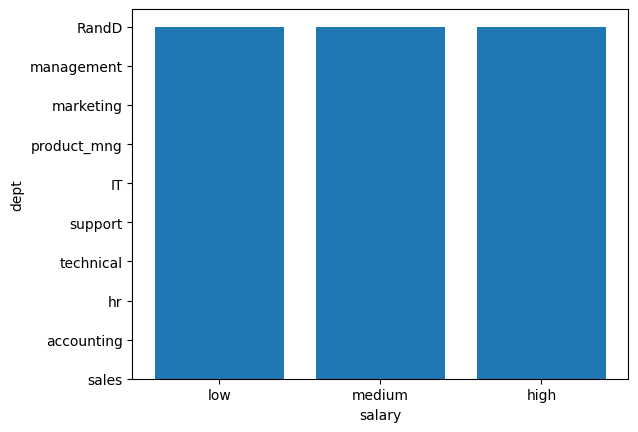

In [30]:
plt.bar(df['salary'],df['dept'])
plt.ylabel('dept')
plt.xlabel('salary')
plt.show()

Text(0.5, 1.0, 'No. of project vs left')

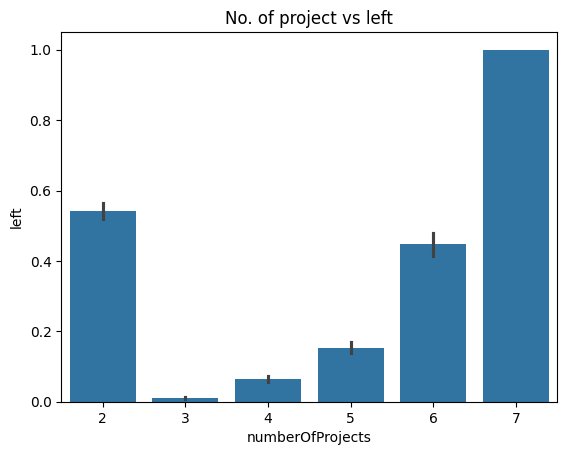

In [31]:
# -	No. of a project vs left

sns.barplot(x='numberOfProjects', y='left', data=df)
plt.title('No. of project vs left')




**Conclusion:-** The graph illustrates that employees who work on more projects have a lower probability of resigning from the company.

Text(0.5, 1.0, 'Satisfactory level vs No. of Projects')

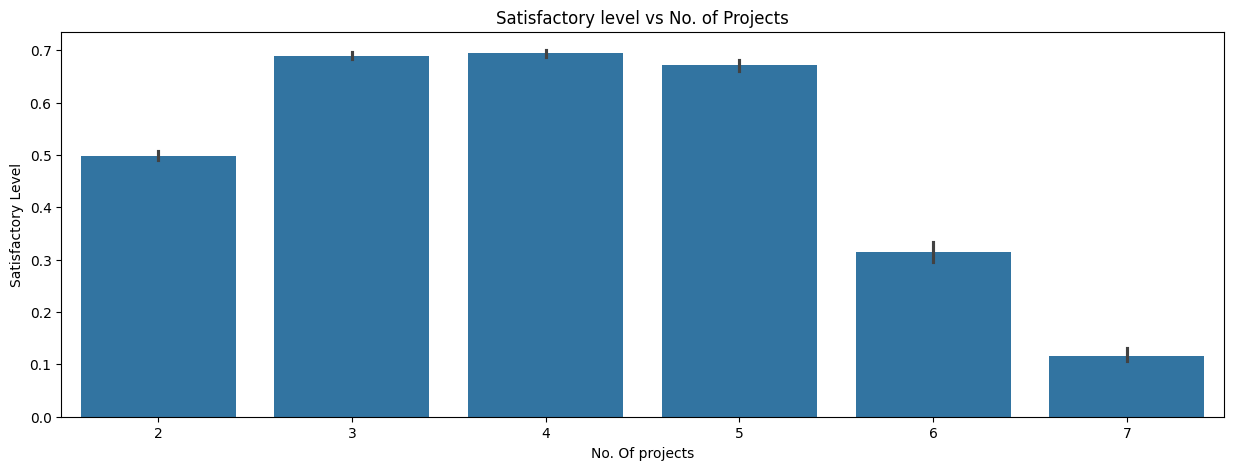

In [32]:
#-	Satisfactory level vs No. of Projects

plt.figure(figsize=(15,5))
sns.barplot(y='satisfactoryLevel',x='numberOfProjects', data=df)
plt.ylabel('Satisfactory Level')
plt.xlabel('No. Of projects')
plt.title('Satisfactory level vs No. of Projects')

**Conclusion:** Employees who are more satisfied tend to work on a greater number of projects. The plot shows this relationship.

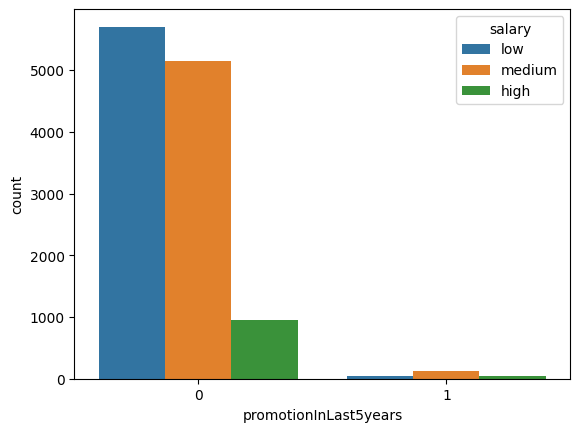

In [33]:
# -	Promotion vs salary
sns.countplot(x='promotionInLast5years',hue='salary',data=df)
plt.show()

**Conclusion:** Employees who have received promotions in the last five years are more likely to earn higher salaries.

<Axes: xlabel='salary', ylabel='count'>

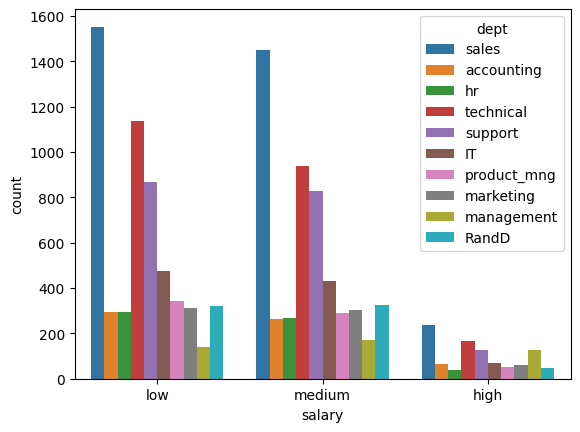

In [34]:
#-	Dept.  vs salary
sns.countplot(data=df,x='salary',hue='dept')

**Conclusion:** According to the counterplot, the salaries of employees differ across various departments.

<Axes: xlabel='satisfactoryLevel'>

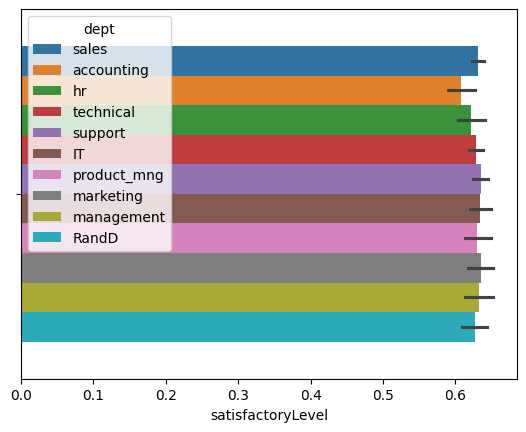

In [35]:
# satisfactory level department-wise (highest/lowest)
sns.barplot(x='satisfactoryLevel',hue='dept',data=df)

Text(0.5, 1.0, 'Satisfactory level vs left')

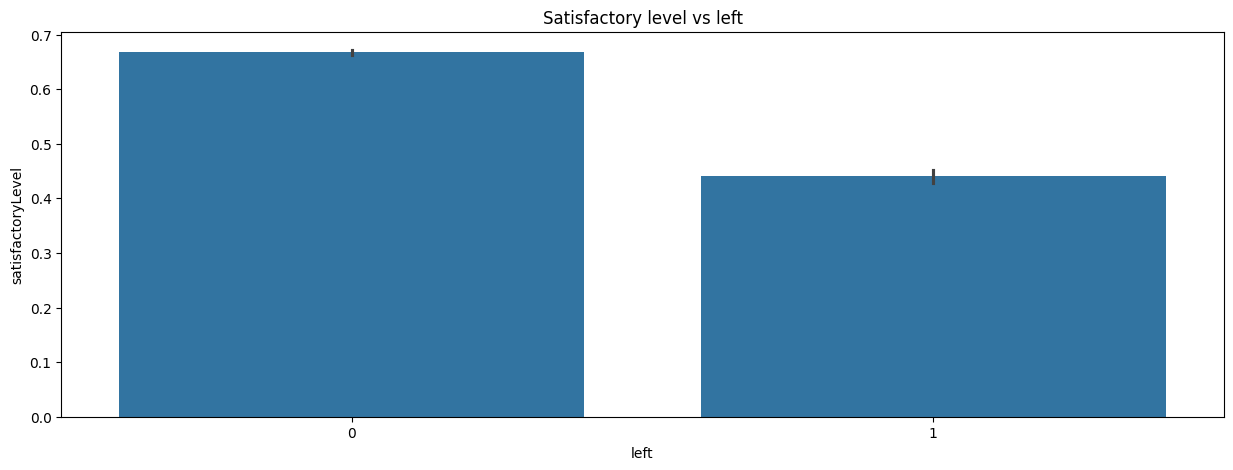

In [36]:
# -	Satisfactory level vs left
plt.figure(figsize=(15,5))
sns.barplot(y='satisfactoryLevel',x='left',data=df)
plt.title('Satisfactory level vs left')

**Conclusion:** Employees with higher satisfactory levels are less likely to leave the company.(0-not left and 1-left)

C:\Users\spinj\AppData\Local\Temp\ipykernel_21380\1997857876.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[['promotionInLast5years','left']], label='promotionInLast5years', shade=True)


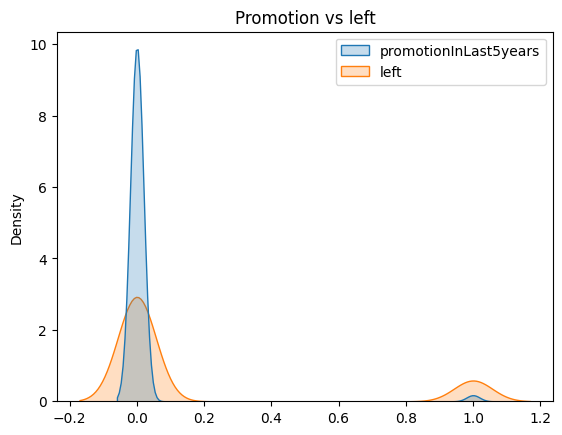

In [37]:
# -	Promotion vs left
sns.kdeplot(data=df[['promotionInLast5years','left']], label='promotionInLast5years', shade=True)
plt.title('Promotion vs left')
plt.show()

**Conclusion:** Employees who have been promoted in the last 5 years are less likely to leave the company.

Text(0.5, 1.0, 'Left vs salary')

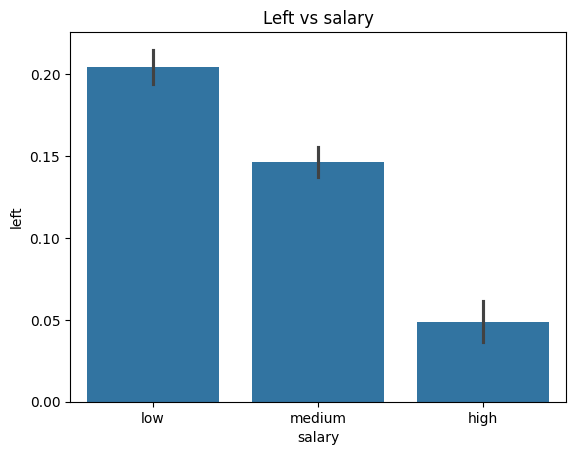

In [38]:
# -	Left vs salary
sns.barplot(x='salary',y='left',data=df)
plt.title('Left vs salary')


**Conclusion:** Employees with higher salaries are less likely to leave the company.

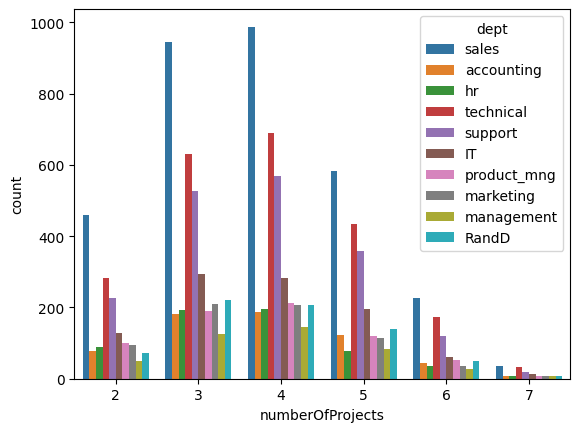

In [39]:
# Department wise projects

sns.countplot(data=df,x='numberOfProjects',hue='dept')
plt.show()

In [40]:
df.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low


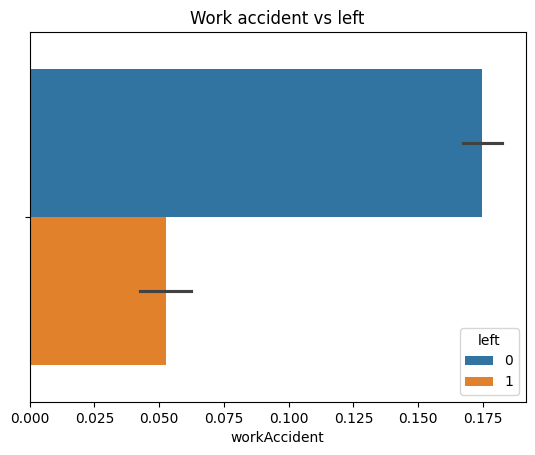

In [41]:
# -	Work accident vs left-Use count plot here and also conclude it
sns.barplot(data=df,x='workAccident',hue='left')
plt.title('Work accident vs left')
plt.show()

In [42]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# df['salary_encoded'] = encoder.fit_transform(df['salary'])

In [43]:
# # -	Avge Monthly Hours vs salary
# sns.barplot(y='avgMonthlyHours',x='salary_encoded',data=df)
# plt.title('Avge Monthly Hours vs salary')

In [44]:
# plt.style.use('seaborn')
# df.hist(bins=50,figsize=(20,15))
# plt.show()

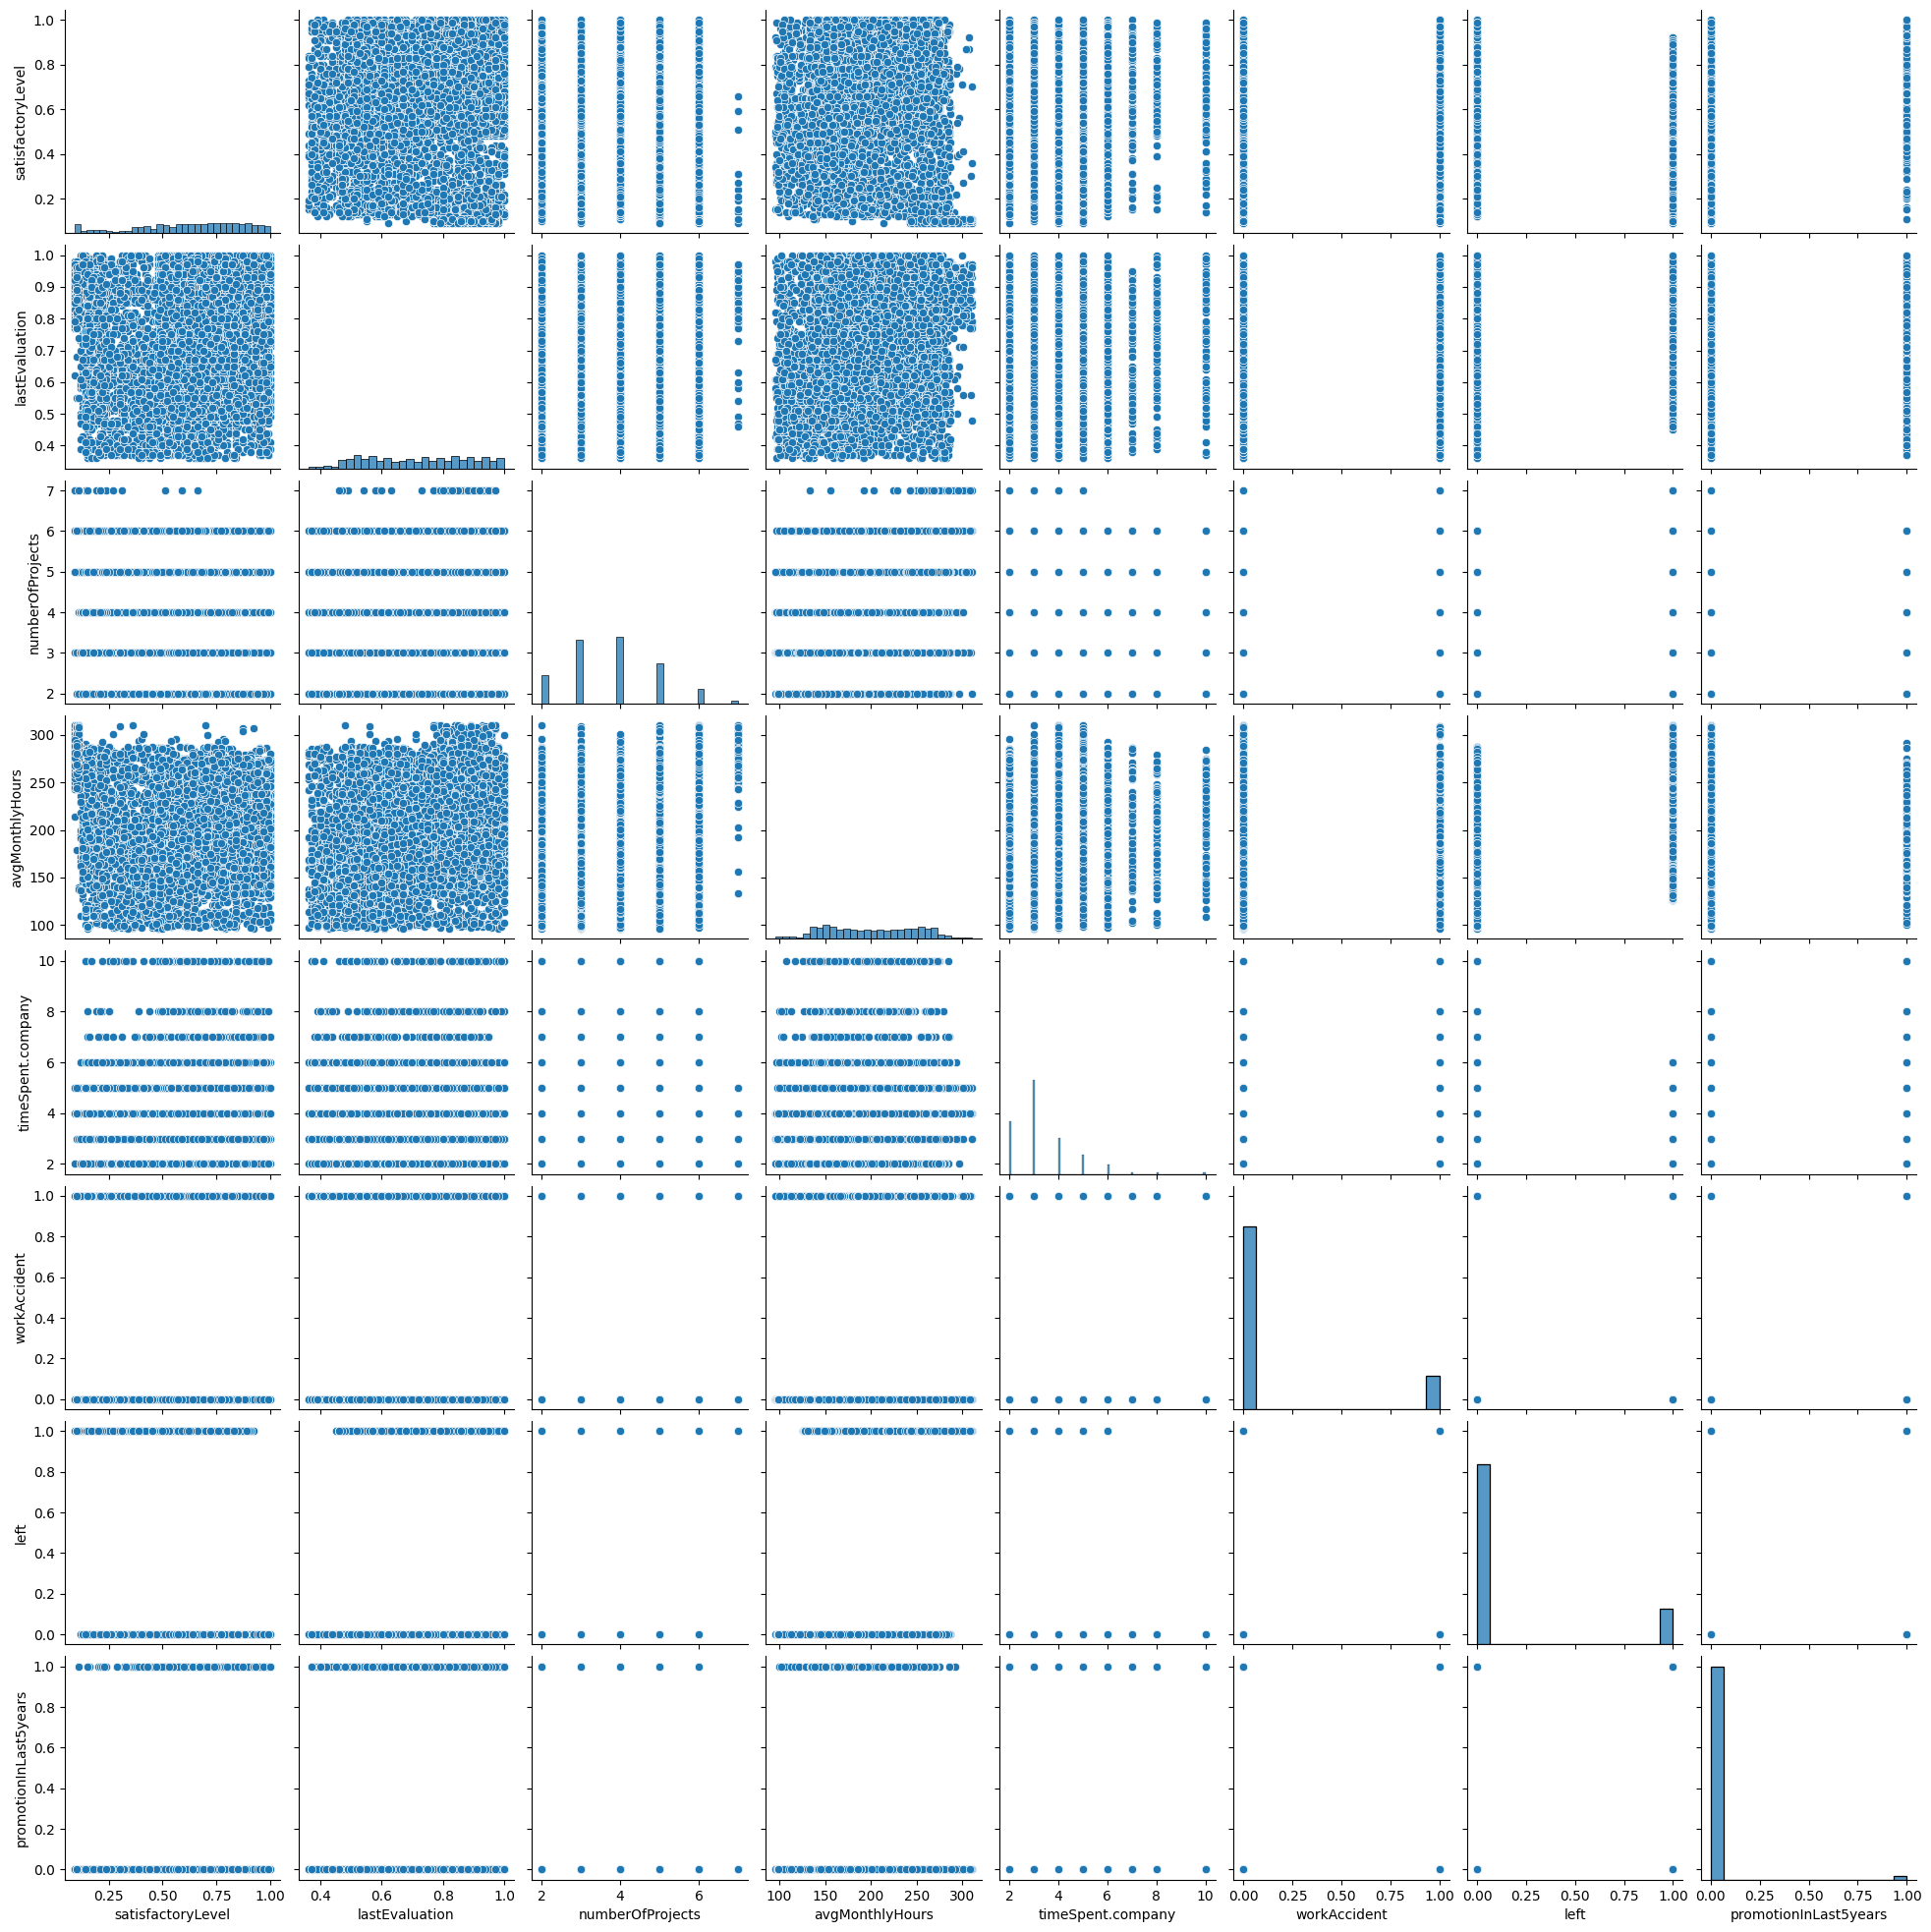

In [45]:
sns.pairplot(df)

In [46]:
df.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low


### 12.	Encoding and standardizing(before and after split)

In [47]:
df['dept'].value_counts()

dept
sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: count, dtype: int64

In [48]:
# use ohe
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
encoder = LabelEncoder()
ohe = OneHotEncoder()

# df['dept'] = ohe.fit_transform(np.array(df['dept']).reshape(-1, 1))
df = pd.get_dummies(df, columns=['dept'], drop_first=True,dtype=int)

# df['salary']=encoder.fit_transform(df['salary'])
df['salary'] = df['salary'].replace({'low':0,'medium':1,'high':2})

C:\Users\spinj\AppData\Local\Temp\ipykernel_21380\3408683613.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['salary'] = df['salary'].replace({'low':0,'medium':1,'high':2})


In [49]:
df.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,salary,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,1,0,0
3,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,1,0,0


In [50]:
df['salary'].value_counts()

salary
0    5740
1    5261
2     990
Name: count, dtype: int64

**Salary encoded**
- low = 0
- medium =1
- high = 2

### Standardization

In [51]:
df.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,salary,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,1,0,0
3,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,1,0,0


In [52]:
x = df.drop(['left','salary'],axis=1) #independent

y = df[['left']] #dependent

In [53]:
from sklearn.preprocessing import StandardScaler
Sd_scaler = StandardScaler()

In [54]:
x_scaled = Sd_scaler.fit_transform(x)
# y_scaled = Sd_scaler.transform(y)

In [55]:
x_scaled

array([[-1.03566801, -1.10899046, -1.54992118, ...,  1.64379699,
        -0.42315015, -0.47981734],
       [ 0.70663718,  0.85137984,  1.02919412, ...,  1.64379699,
        -0.42315015, -0.47981734],
       [-2.15572134,  0.97019016,  2.74860432, ...,  1.64379699,
        -0.42315015, -0.47981734],
       ...,
       [ 0.37476953,  0.01970759,  0.16948902, ..., -0.60834763,
        -0.42315015,  2.08412641],
       [-1.6164364 ,  1.14840564,  1.02919412, ...,  1.64379699,
        -0.42315015, -0.47981734],
       [ 0.58218681,  0.67316436,  1.88889922, ..., -0.60834763,
         2.36322735, -0.47981734]])

In [56]:
from sklearn.model_selection import train_test_split


In [57]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.3,random_state=42)

In [58]:
x_train.shape,x_test.shape

((8393, 16), (3598, 16))

In [59]:
y_train.shape,y_test.shape

((8393, 1), (3598, 1))

In [60]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [61]:
lr.fit(x_train,y_train)

d:\Machine learning\ML_Env\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [62]:
y_pred = lr.predict(x_test)
x_pred = lr.predict(x_train)

In [63]:
# ## Confusion Metix
from sklearn.metrics import *
confusion_matrix(y_test,y_pred)
print('1_Report:',classification_report(y_test,y_pred))
print('2_Report:',classification_report(y_train,x_pred))

1_Report:               precision    recall  f1-score   support

           0       0.86      0.96      0.91      3008
           1       0.49      0.21      0.29       590

    accuracy                           0.84      3598
   macro avg       0.68      0.58      0.60      3598
weighted avg       0.80      0.84      0.81      3598

2_Report:               precision    recall  f1-score   support

           0       0.86      0.96      0.91      6992
           1       0.51      0.23      0.32      1401

    accuracy                           0.83      8393
   macro avg       0.68      0.59      0.61      8393
weighted avg       0.80      0.83      0.81      8393



In [64]:
print('Test Accuracy_score:',accuracy_score(y_test,y_pred))
print('Train Accuracy_score:',accuracy_score(y_train,x_pred))

Test Accuracy_score: 0.8351862145636465
Train Accuracy_score: 0.83438579768855


## Decision Tree

In [65]:
from sklearn.tree import DecisionTreeClassifier
Dtree = DecisionTreeClassifier()

Dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [66]:
y_pred_dt = Dtree.predict(x_test)
x_pred_dt = Dtree.predict(x_train)

**Model Evaluation Techniques:**

1. **Accuracy:** The most common metric, measures the proportion of correctly classified instances.
2. **Precision:** Measures the proportion of positive predictions that are actually positive.
3. **Recall:** Measures the proportion of actual positives that are correctly predicted.
4. **F1-score:** Harmonic mean of precision and recall.
5. **Confusion Matrix:** Shows the number of correct and incorrect predictions for each class.


In [67]:

print('1_Report:',classification_report(y_test,y_pred_dt))
print('2_Report:',classification_report(y_train,x_pred_dt))

1_Report:               precision    recall  f1-score   support

           0       0.99      0.98      0.98      3008
           1       0.90      0.93      0.91       590

    accuracy                           0.97      3598
   macro avg       0.94      0.95      0.95      3598
weighted avg       0.97      0.97      0.97      3598

2_Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6992
           1       1.00      1.00      1.00      1401

    accuracy                           1.00      8393
   macro avg       1.00      1.00      1.00      8393
weighted avg       1.00      1.00      1.00      8393



In [68]:
print('Test Accuracy_score:',accuracy_score(y_test,y_pred_dt))
print('Train Accuracy_score:',accuracy_score(y_train,x_pred_dt))

Test Accuracy_score: 0.971650917176209
Train Accuracy_score: 1.0


## Random Forest

In [69]:
from sklearn.ensemble import RandomForestClassifier

Rf=RandomForestClassifier(n_estimators=100)
Rf.fit(x_train,y_train)
y_pred=Rf.predict(x_test)

d:\Machine learning\ML_Env\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


"After increasing the number of estimators, the accuracy of the model has changed."

In [70]:
from sklearn.metrics import *


# Accuracy Score for test data
print(accuracy_score(y_test,y_pred))

#Accuracy Score for train data

print(accuracy_score(y_train,Rf.predict(x_train)))

0.9852695942190106
1.0


In [71]:
# Feature Importance

feature_im = pd.Series(Rf.feature_importances_, index=x.columns).sort_values(ascending=True)
feature_im

dept_product_mng         0.001094
dept_marketing           0.001129
dept_management          0.001444
dept_hr                  0.001512
promotionInLast5years    0.001528
dept_accounting          0.001554
dept_RandD               0.001782
dept_support             0.002444
dept_technical           0.003211
dept_sales               0.003347
workAccident             0.007955
lastEvaluation           0.123996
avgMonthlyHours          0.156139
numberOfProjects         0.166941
timeSpent.company        0.171676
satisfactoryLevel        0.354249
dtype: float64

- Analyzed the feature importance of the Random Forest model to understand the most influential factors contributing to employee turnover.

**Conclusion:**Drop feature one with the lowest importance and check accuracy for each step.




In [73]:
x = df.drop(['left','salary','promotionInLast5years','workAccident'],axis=1)

In [74]:
y = df[['left']]

In [75]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [77]:
import warnings
warnings.filterwarnings('ignore')

In [78]:
from sklearn.ensemble import RandomForestClassifier


Rf=RandomForestClassifier(n_estimators=130)
Rf.fit(x_train,y_train)
y_pred=Rf.predict(x_test)

In [79]:
from sklearn.metrics import *


# Accuracy Score for test data
print(accuracy_score(y_test,y_pred))

#Accuracy Score for train data

print(accuracy_score(y_train,Rf.predict(x_train)))

0.9833263859941642
1.0


In [80]:
def classification_report(x, y, test_size=0.2):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=42)

    models = {
        'Logistic Regression': LogisticRegression(),
        'Decision Tree': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier()
    }

    results = {}

    for model_name, model in models.items():
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        results[model_name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-score': f1}

    return results

results = classification_report(x, y)
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(f"Precision: {metrics['Precision']:.4f}")
    print(f"Recall: {metrics['Recall']:.4f}")
    print(f"F1-score: {metrics['F1-score']:.4f}")
    print()

Model: Logistic Regression
Accuracy: 0.8283
Precision: 0.4470
Recall: 0.1482
F1-score: 0.2226

Model: Decision Tree
Accuracy: 0.9687
Precision: 0.8929
Recall: 0.9221
F1-score: 0.9073

Model: Random Forest
Accuracy: 0.9846
Precision: 0.9918
Recall: 0.9146
F1-score: 0.9516



In [81]:

def highest_model_accuracy(df):
    x = df.drop(columns=['left','salary'])  # Assuming 'left' column contains the target variable
    y = df['left']

    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

    models = {
        'Logistic Regression': LogisticRegression(),
        'Decision Tree': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier()
    }

    highest_accuracies = {}

    for model_name, model in models.items():
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)

        highest_accuracies[model_name] = accuracy

    best_model = max(highest_accuracies, key=highest_accuracies.get)
    best_accuracy = highest_accuracies[best_model]

    return best_model, best_accuracy

best_model, best_accuracy = highest_model_accuracy(df)
print(f"Best Model: {best_model}")
print(f"Highest Accuracy: {best_accuracy:.4f}")


Best Model: Random Forest
Highest Accuracy: 0.9860


In [82]:
def backward_feature_elimination(df, target_col, model, test_size=0.25, random_state=None):
    # Extract features and target
    x = df.drop(columns=['left','salary'])  # Assuming 'left' column contains the target variable
    y = df['left']

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=random_state)

    # Initial accuracy with all features
    model.fit(X_train, y_train)
    y_pred_initial = model.predict(X_test)
    accuracy_initial = accuracy_score(y_test, y_pred_initial)
    print(f"Initial Accuracy with all features: {accuracy_initial:.4f}")

    # Track best accuracy and corresponding feature set
    best_accuracy = accuracy_initial
    best_features = list(x.columns)

    # Iterate until accuracy stops changing
    while True:
        # Get feature importances
        model.fit(X_train, y_train)
        importances = model.feature_importances_

        # Identify the least important feature
        least_important_idx = np.argmin(importances)
        least_important_feature = x.columns[least_important_idx]
        print(f"Removing least important feature: {least_important_feature}")

        # Remove the least important feature
        X_train.drop(columns=[least_important_feature], axis=1, inplace=True)
        X_test = X_test.drop(columns=[least_important_feature])

        # Retrain the model and calculate accuracy
        model.fit(X_train, y_train)
        y_pred_new = model.predict(X_test)
        accuracy_new = accuracy_score(y_test, y_pred_new)
        print(f"New Accuracy after feature elimination: {accuracy_new:.4f}")

        # Check if accuracy has changed significantly
        if np.isclose(accuracy_new, best_accuracy, atol=1e-5):
            print("Accuracy no longer improving. Stopping feature elimination.")
            break

        # Update best accuracy and feature set
        best_accuracy = accuracy_new
        best_features.remove(least_important_feature)

    # Return the best accuracy and corresponding feature set
    return best_accuracy, best_features
# Specify the target column and model (e.g., RandomForestClassifier)
target_col = 'left'
model = RandomForestClassifier(n_estimators=150,random_state=42)

best_accuracy, best_features = backward_feature_elimination(df, target_col, model)

print(f"Best Accuracy after feature elimination: {best_accuracy:.4f}")
print("Best Features:", best_features)


Initial Accuracy with all features: 0.9830
Removing least important feature: dept_product_mng
New Accuracy after feature elimination: 0.9827
Removing least important feature: dept_hr
New Accuracy after feature elimination: 0.9823
Removing least important feature: dept_management
New Accuracy after feature elimination: 0.9827
Removing least important feature: promotionInLast5years
New Accuracy after feature elimination: 0.9823
Removing least important feature: dept_accounting
New Accuracy after feature elimination: 0.9823
Accuracy no longer improving. Stopping feature elimination.
Best Accuracy after feature elimination: 0.9823
Best Features: ['satisfactoryLevel', 'lastEvaluation', 'numberOfProjects', 'avgMonthlyHours', 'timeSpent.company', 'workAccident', 'dept_RandD', 'dept_accounting', 'dept_marketing', 'dept_sales', 'dept_support', 'dept_technical']


Conclusion:

- The analysis revealed several insights into the factors influencing employee turnover.
- Job satisfaction, salary, and promotion opportunities were identified as key factors.
- The Random Forest model demonstrated the best performance in predicting employee turnover.
- These findings can be utilized by the company to develop strategies for improving employee retention.

In this project, we used logistic regression, decision tree, and Random Forest Algorithm to analyze employee data and effectively predict employee turnover. The findings highlighted the significance of factors such as job satisfaction, salary, and promotion opportunities in retaining employees.

#### Motivation and Reasons For Choosing the Algorithm.

- **Logistic Regression:** Simple, interpretable, and robust to outliers.
- **Decision Tree:** Easy to understand and visualize, handles non-linear relationships.
- **Random Forest:** Combines multiple decision trees to improve accuracy and reduce overfitting.

# Model Evaluation and Techniques



Model Evaluation Techniques:**

1. **Accuracy:** The most common metric, measures the proportion of correctly classified instances.
2. **Precision:** Measures the proportion of positive predictions that are actually positive.
3. **Recall:** Measures the proportion of actual positives that are correctly predicted.
4. **F1-score:** Harmonic mean of precision and recall.
5. **ROC Curve:** Plots the true positive rate against the false positive rate at different classification thresholds.
6. **AUC:** Area under the ROC curve, measures the overall performance of a classifier.
7. **Confusion Matrix:** Shows the number of correct and incorrect predictions for each class.
8. **Cross-validation:** Divides the data into multiple folds, trains the model on each fold, and evaluates it on the remaining folds.
9. **Hyperparameter tuning:** Selects the best values for the model's hyperparameters to maximize performance.
10. **Feature importance:** Identifies the most important features for predicting the target variable.

In [80]:
import pickle
pickle.dump(Rf,open('randomForest.pkl','wb'))
pickle.dump(Dtree,open('DecisionTree.pkl','wb'))

In [83]:
# Save The Clean Data

df.to_csv('EmployeeChurn_CleanData.csv')

In [ ]:
df.head(1)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11991 entries, 0 to 14998
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfactoryLevel      11991 non-null  float64
 1   lastEvaluation         11991 non-null  float64
 2   numberOfProjects       11991 non-null  int64  
 3   avgMonthlyHours        11991 non-null  int64  
 4   timeSpent.company      11991 non-null  int64  
 5   workAccident           11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotionInLast5years  11991 non-null  int64  
 8   salary                 11991 non-null  int32  
 9   salary_encoded         11991 non-null  int32  
 10  dept_RandD             11991 non-null  int32  
 11  dept_accounting        11991 non-null  int32  
 12  dept_hr                11991 non-null  int32  
 13  dept_management        11991 non-null  int32  
 14  dept_marketing         11991 non-null  int32  
 15  dept_pr